In [1]:
import pysr

pysr.install(precompile=False)

In [2]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

#Introduction
To start the project first I am going to see to what extent PySR is capable by varying:
- seed
- error
- number of points


Let´s start with the function
$$ f(x)=113 \cdot e^{-2(x-1)^2 }$$
in which each point has a poisson distribution with average value $f(x)$


In [3]:
np.random.seed(0)
n = 3000
X = 6 * np.random.rand(n,2)-3
H = 113 * np.exp(-2 * (X[:, 0]-1) * (X[:, 0]-1))
y = np.random.poisson(H, n)

Let's vizualize our dataset:

Text(0, 0.5, '$y$')

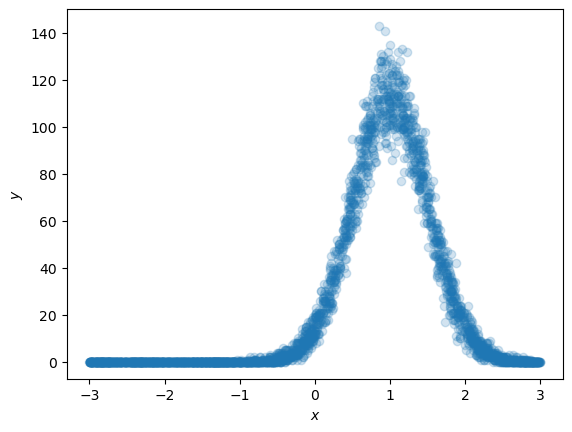

In [4]:
plt.scatter(X[:,0], y, alpha=0.2)
plt.xlabel("$x$")
plt.ylabel("$y$")

Starting our symbolic regression algorithm...

In [5]:
model = PySRRegressor(
    niterations=5,
    populations=100,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"],
)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:208: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(


Started!

Expressions evaluated per second: 6.580e+04
Head worker occupation: 8.1%
Progress: 154 / 500 total iterations (30.800%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.369e+03  1.594e+01  y = 23.599
3           1.323e+03  1.688e-02  y = (23.599 + x₀)
4           1.323e+03  2.384e-07  y = (x₀ + exp(3.1622))
5           1.176e+03  1.183e-01  y = (7.9665 * (2.9837 + x₀))
11          1.038e+03  2.070e-02  y = exp(exp(exp((-0.094159 * exp(x₀ * -1.0422)) + 0.29823)))
13          1.030e+03  3.971e-03  y = (exp(exp(exp((-0.094159 * exp(x₀ * -1.0422)) + 0.29823))) ...
                                  + -1.8091)
14          9.867e+02  4.303e-02  y = (exp(exp(0.54389)) * exp(exp((-0.17663 * (exp(x₀) * x₀)) +...
                                   x₀)))
15          9.858e+02  8.619e-04  y = (exp(exp(exp((-0.094159 * exp(1.3014 * (x₀ * -1.0422))) + ...
                

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          23.598736   
	1         0.016883                                   (23.621273 + x0)   
	2         0.059171                      (7.966537 * (2.9836836 + x0))   
	3         0.295389           exp(exp(exp(x0 * exp(x0 * -0.9420922))))   
	4         1.031172     exp(exp(exp(x0 * exp(exp(x0) * -0.30330423))))   
	5         0.118394  (exp(exp(x0 * exp((x0 * -1.0421572) + 1.405490...   
	6         0.077206  (exp(exp(x0 * exp(((x0 * -1.0421572) * 1.01448...   
	7         0.088821  (exp(exp(exp((x0 * 1.4395193) * exp(x0 * -1.18...   
	8         0.054621  (exp(0.9689043) * exp(exp((-0.15339491 * (exp(...   
	9   >>>>  0.261832  ((exp(exp((-0.16757303 * (exp(x0) * x0)) + (x0...   
	10        0.047341  (exp(exp(exp(x0 * exp((-1.0460979 * exp(x0)) *...   
	
	           loss  complexity  
	0   1368.724000           1  
	1   1323.278000           3  
	2   1175.589100           5  
	3    360.672180           9  
	4    128.611720          10  
	5    101.495125          12  
	6     86.973070          14  
	7     72.817550          16  
	8     68.946846          17  
	9     53.064297          18  
	10    50.610710          19  
]

In [7]:
model.sympy()

exp(2.75863722849811*exp(x0*(0.0743565897246468 - 0.534841645335294*x0) + x0))

We can see that the equation of our regression looks nothing like the one we started with.

Two ideas follow:
- Increasing the complexity of the exponential operator;
- Increasing the number of points of our dataset;

This is a problem that has nothing to do with the seed nor with the error, as PySR is perfecly cpable of handling with a Poisson distribution.

Still, we can see that the curve adjusts somewhat well to our dataset. The only thing is that the expression is much uglier than the one we wanted to find.

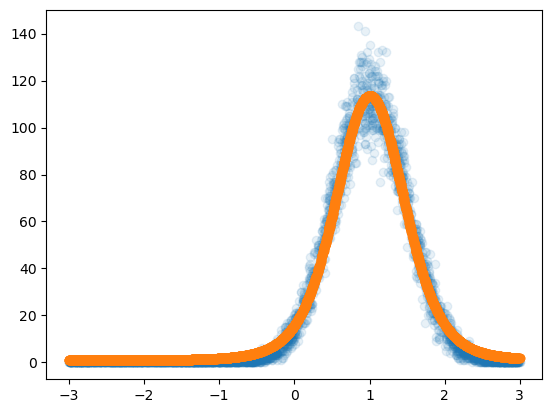

In [8]:
best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()
model.sympy(best_idx)
plt.scatter(X[:, 0], y, alpha=0.1)
y_prediction = model.predict(X, index=best_idx)
plt.scatter(X[:, 0], y_prediction)

So let´s do the same thing, with another seed, but now with double the points in the dataset:

In [9]:
np.random.seed(1)
n = 6000
X = 6 * np.random.rand(n,2)-3
H = 113 * np.exp(-2 * X[:, 0] * X[:, 0])
y = np.random.poisson(H, n)

model = PySRRegressor(
    niterations=5,
    populations=100,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"],
)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 8} will be ignored.
  warnings.warn(


Started!

Expressions evaluated per second: 1.350e+03
Head worker occupation: 0.0%
Progress: 3 / 500 total iterations (0.600%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.888e+03  1.594e+01  y = 1.9418
2           1.690e+03  1.111e-01  y = exp(1.9418)
4           1.455e+03  7.473e-02  y = exp(0.85092 + 1.9418)
6           1.393e+03  2.169e-02  y = exp((0.85092 + 1.9418) + 0.39277)
10          1.393e+03  1.490e-08  y = (exp(exp(exp(0.22495)) + -0.32613) + (0.088697 + 0.22823))
12          1.393e+03  2.980e-08  y = (exp(exp(exp(-0.33088)) + exp(0.0035265)) + exp(0.46611 + ...
                                  0.62522))
14          1.245e+03  5.611e-02  y = (exp((((x₀ * -1.4253) * x₀) + (1.9418 + 0.69816)) + 0.3927...
                                  7) + 1.0164)
15          3.185e+02  1.364e+00  y = (exp((((x₀ * -1.4253) * x₀) + (2.0029 + 0.69816)) + exp(0....
  

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.750e+04
Head worker occupation: 1.1%
Progress: 291 / 500 total iterations (58.200%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.393e+03  1.594e+01  y = 24.187
5           1.393e+03  4.676e-05  y = (24.187 + (0.30136 * x₁))
6           1.274e+03  8.896e-02  y = (-2.0649 * (-15.6 + exp(x₀)))
9           2.183e+02  5.881e-01  y = exp(exp(1.4741 + ((-0.22524 * x₀) * x₀)))
10          1.971e+02  1.024e-01  y = exp(((x₀ * -1.9518) * x₀) + (2.0029 + 2.3667))
11          2.880e+01  1.923e+00  y = exp(((x₀ * -1.9518) * x₀) + (2.0029 + exp(1.018)))
12          2.401e+01  1.820e-01  y = (exp(((x₀ * -1.9906) * x₀) + 3.5801) * (0.75975 + 2.3903))
16          2.401e+01  4.917e-07  y = (exp(((((x₀ * -1.4257) * x₀) * 1.3969) + 1.885) + 1.9474) ...
                                  * (1.9233

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          24.187117   
	1        4.678094e-05                    (24.187117 + (0.30136076 * x1))   
	2        8.896471e-02              (-2.0649335 * (-15.599603 + exp(x0)))   
	3        9.716225e-02            (-2.0649335 * (-15.599603 + (x0 * x0)))   
	4  >>>>  3.874595e+00           exp(((x0 * -1.990807) * x0) + 4.7273507)   
	5        7.600480e-07  (exp(((x0 * -1.9909991) * x0) + (1.1689838 * 4...   
	6        9.500476e-05  ((exp(((x0 * -1.9911497) * x0) + 3.679361) * 2...   
	
	          loss  complexity  
	0  1393.326000           1  
	1  1393.065300           5  
	2  1274.484600           6  
	3  1156.478500           7  
	4    24.011677           8  
	5    24.011604          12  
	6    24.007042          14  
]

In [10]:
model.sympy()

112.99580566335*exp(-1.990807*x0**2)

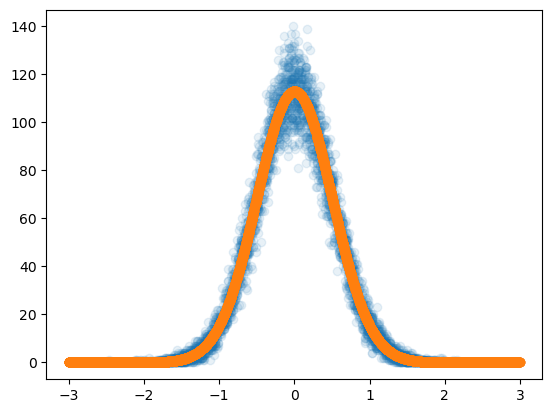

In [11]:
best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()
model.sympy(best_idx)
plt.scatter(X[:, 0], y, alpha=0.1)
y_prediction = model.predict(X, index=best_idx)
plt.scatter(X[:, 0], y_prediction)

The problem appears to be the same. Now let´s test with the same dataset but increasing the exponential's complexity.

In [12]:
model = PySRRegressor(
    niterations=5,
    populations=100,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"],
    complexity_of_operators={"exp": 2},
)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 8} will be ignored.
  warnings.warn(


Started!

Expressions evaluated per second: 4.550e+04
Head worker occupation: 3.4%
Progress: 117 / 500 total iterations (23.400%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.393e+03  1.594e+01  y = 24.187
5           1.393e+03  4.678e-05  y = (24.187 + (0.28728 * x₁))
11          1.262e+03  1.641e-02  y = (exp(exp(1.1547)) + ((x₀ * -1.1833) * x₀))
13          1.198e+03  2.604e-02  y = ((exp(1.7373 + 1.7373) + x₀) + ((x₀ * -1.7357) * x₀))
15          2.994e+02  6.935e-01  y = exp((1.7427 + exp(exp((-0.84621 * x₀) * x₀))) + 0.18593)
17          7.619e+01  6.843e-01  y = exp(exp(exp((0.24402 * (-2.6919 * x₀)) * x₀) + 0.49786) + ...
                                  0.32939)
19          6.581e+01  7.327e-02  y = (exp(((1.7427 + 0.1851) * exp(exp((-0.70764 * x₀) * x₀))) ...
                                  + -0.43804) + x₀)
------------------------------------------

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          24.187277   
	1        0.000047                     (24.186077 + (x1 * 0.2945111))   
	2        0.282176              (51.276966 + ((x0 * -9.156568) * x0))   
	3        0.067664         exp(((x0 * x0) + -1.5687276) * -2.4912958)   
	4  >>>>  1.479033  (exp(((x0 * x0) + -1.5687276) * -2.4912958) * ...   
	5        0.042812  ((exp(((x0 * x0) + -1.5687276) * -2.473747) * ...   
	6        0.112149  (exp(((x0 * (x0 + (x0 * -0.15727612))) + -1.56...   
	7        0.020010  (exp(((1.9601622 + (((-3.0188916 * x0) + x0) *...   
	
	          loss  complexity  
	0  1393.326000           1  
	1  1393.065000           5  
	2   792.275700           7  
	3   691.997300           9  
	4    35.927982          11  
	5    32.979713          13  
	6    26.353352          15  
	7    24.326252          19  
]

In [13]:
model.sympy()

117.819686695962*exp(-2.4912958*x0**2)

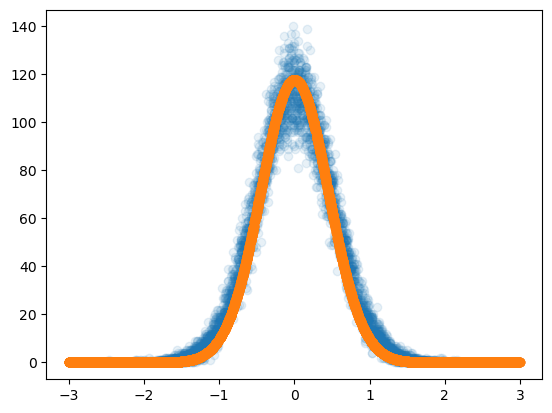

In [14]:
best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()
model.sympy(best_idx)
plt.scatter(X[:, 0], y, alpha=0.1)
y_prediction = model.predict(X, index=best_idx)
plt.scatter(X[:, 0], y_prediction)